## Project 7: MultiLayer Perceptron (MLP) Network Performance on Cifar10 Dataset

In [ ]:
# do necessary imports
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:
# load the cifar10 dataset
(trainx, trainy), (testx, testy) = cifar10.load_data()
trainx.shape

(50000, 32, 32, 3)

As you can see, the images in the data set come in the form of 
32x32x3 size numpy arrays. We need to reshape the train dataset as 
follows:

In [3]:
trainx = trainx.reshape((trainx.shape[0], 3072))
testx = testx.reshape((testx.shape[0], 3072))
trainx = trainx.astype('float')/255.0
testx = testx.astype('float')/255.0

In [4]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainy = lb.fit_transform(trainy)
testy = lb.transform(testy)

#initialise label names
labelNames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
              'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
# construct the MLP deep neural network using Keras
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 3,676,682
Trainable params: 3,676,682
Non-trainable params: 0
_________________________________________________________________


In [6]:
# instantiate a stochastic gradient optimiser and use categorical cross entropy loss
# we will terminate model training after 100 epochs
sgd = SGD(0.01)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
H = model.fit(trainx, trainy, validation_data=(testx, testy),
              epochs=1000, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/1000
50000/50000 [==============================] - 21s 430us/step - loss: 1.9543 - acc: 0.3040 - val_loss: 1.8409 - val_acc: 0.3451
Epoch 2/1000
50000/50000 [==============================] - 2s 48us/step - loss: 1.7860 - acc: 0.3753 - val_loss: 1.7567 - val_acc: 0.3786
Epoch 3/1000
50000/50000 [==============================] - 2s 48us/step - loss: 1.7157 - acc: 0.3984 - val_loss: 1.6912 - val_acc: 0.4065
Epoch 4/1000
50000/50000 [==============================] - 3s 68us/step - loss: 1.6669 - acc: 0.4176 - val_loss: 1.6706 - val_acc: 0.4073
Epoch 5/1000
50000/50000 [==============================] - 3s 55us/step - loss: 1.6248 - acc: 0.4320 - val_loss: 1.6122 - val_acc: 0.4372
Epoch 6/1000
50000/50000 [==============================] - 2s 48us/step - loss: 1.5934 - acc: 0.4437 - val_loss: 1.5865 - val_acc: 0.4427
Epoch 7/1000
50000/50000 [==============================] - 3s 51u

50000/50000 [==============================] - 3s 67us/step - loss: 0.5559 - acc: 0.8173 - val_loss: 1.4056 - val_acc: 0.5492
Epoch 116/1000
50000/50000 [==============================] - 3s 52us/step - loss: 0.5446 - acc: 0.8230 - val_loss: 1.4267 - val_acc: 0.5510
Epoch 117/1000
50000/50000 [==============================] - 2s 47us/step - loss: 0.5453 - acc: 0.8225 - val_loss: 1.4436 - val_acc: 0.5458
Epoch 118/1000
50000/50000 [==============================] - 2s 48us/step - loss: 0.5299 - acc: 0.8265 - val_loss: 1.4142 - val_acc: 0.5544
Epoch 119/1000
50000/50000 [==============================] - 2s 46us/step - loss: 0.5345 - acc: 0.8256 - val_loss: 1.5782 - val_acc: 0.5118
Epoch 120/1000
50000/50000 [==============================] - 2s 47us/step - loss: 0.5215 - acc: 0.8304 - val_loss: 1.4365 - val_acc: 0.5463
Epoch 121/1000
50000/50000 [==============================] - 2s 47us/step - loss: 0.5150 - acc: 0.8320 - val_loss: 1.4234 - val_acc: 0.5563
Epoch 122/1000
50000/50000 [

50000/50000 [==============================] - 3s 61us/step - loss: 0.0725 - acc: 0.9888 - val_loss: 1.9820 - val_acc: 0.5600
Epoch 232/1000
50000/50000 [==============================] - 3s 50us/step - loss: 0.1641 - acc: 0.9728 - val_loss: 1.9366 - val_acc: 0.5592
Epoch 233/1000
50000/50000 [==============================] - 3s 52us/step - loss: 0.1263 - acc: 0.9778 - val_loss: 2.0383 - val_acc: 0.5506
Epoch 234/1000
50000/50000 [==============================] - 2s 48us/step - loss: 0.0624 - acc: 0.9925 - val_loss: 1.9885 - val_acc: 0.5580
Epoch 235/1000
50000/50000 [==============================] - 2s 47us/step - loss: 0.1715 - acc: 0.9713 - val_loss: 2.2034 - val_acc: 0.5371
Epoch 236/1000
50000/50000 [==============================] - 2s 48us/step - loss: 0.0669 - acc: 0.9911 - val_loss: 2.0264 - val_acc: 0.5588
Epoch 237/1000
50000/50000 [==============================] - 2s 47us/step - loss: 0.0540 - acc: 0.9943 - val_loss: 2.0160 - val_acc: 0.5580
Epoch 238/1000
50000/50000 [

50000/50000 [==============================] - 2s 48us/step - loss: 0.0104 - acc: 0.9999 - val_loss: 2.4185 - val_acc: 0.5575
Epoch 348/1000
50000/50000 [==============================] - 2s 48us/step - loss: 0.0102 - acc: 0.9999 - val_loss: 2.4196 - val_acc: 0.5593
Epoch 349/1000
50000/50000 [==============================] - 2s 48us/step - loss: 0.0103 - acc: 0.9998 - val_loss: 2.4196 - val_acc: 0.5587
Epoch 350/1000
50000/50000 [==============================] - 2s 47us/step - loss: 0.0102 - acc: 0.9999 - val_loss: 2.4283 - val_acc: 0.5591
Epoch 351/1000
50000/50000 [==============================] - 2s 48us/step - loss: 0.0100 - acc: 1.0000 - val_loss: 2.4219 - val_acc: 0.5595
Epoch 352/1000
50000/50000 [==============================] - 2s 46us/step - loss: 0.0099 - acc: 1.0000 - val_loss: 2.4253 - val_acc: 0.5606
Epoch 353/1000
50000/50000 [==============================] - 2s 47us/step - loss: 0.0099 - acc: 1.0000 - val_loss: 2.4359 - val_acc: 0.5590
Epoch 354/1000
50000/50000 [

50000/50000 [==============================] - 2s 48us/step - loss: 0.0046 - acc: 1.0000 - val_loss: 2.6333 - val_acc: 0.5584
Epoch 464/1000
50000/50000 [==============================] - 3s 57us/step - loss: 0.0046 - acc: 1.0000 - val_loss: 2.6335 - val_acc: 0.5582
Epoch 465/1000
50000/50000 [==============================] - 3s 61us/step - loss: 0.0046 - acc: 1.0000 - val_loss: 2.6381 - val_acc: 0.5568
Epoch 466/1000
50000/50000 [==============================] - 3s 51us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 2.6380 - val_acc: 0.5567
Epoch 467/1000
50000/50000 [==============================] - 2s 47us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 2.6367 - val_acc: 0.5582
Epoch 468/1000
50000/50000 [==============================] - 3s 50us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 2.6416 - val_acc: 0.5580
Epoch 469/1000
50000/50000 [==============================] - 2s 49us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 2.6422 - val_acc: 0.5580
Epoch 470/1000
50000/50000 [

50000/50000 [==============================] - 3s 50us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 2.7677 - val_acc: 0.5557
Epoch 580/1000
50000/50000 [==============================] - 2s 48us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 2.7662 - val_acc: 0.5560
Epoch 581/1000
50000/50000 [==============================] - 2s 46us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 2.7672 - val_acc: 0.5566
Epoch 582/1000
50000/50000 [==============================] - 2s 47us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 2.7689 - val_acc: 0.5566
Epoch 583/1000
50000/50000 [==============================] - 2s 48us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 2.7720 - val_acc: 0.5552
Epoch 584/1000
50000/50000 [==============================] - 2s 50us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 2.7728 - val_acc: 0.5573
Epoch 585/1000
50000/50000 [==============================] - 3s 54us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 2.7711 - val_acc: 0.5567
Epoch 586/1000
50000/50000 [

50000/50000 [==============================] - 2s 48us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 2.8616 - val_acc: 0.5556
Epoch 696/1000
50000/50000 [==============================] - 3s 56us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 2.8623 - val_acc: 0.5548
Epoch 697/1000
50000/50000 [==============================] - 3s 60us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 2.8637 - val_acc: 0.5558
Epoch 698/1000
50000/50000 [==============================] - 3s 50us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 2.8654 - val_acc: 0.5559
Epoch 699/1000
50000/50000 [==============================] - 2s 48us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 2.8644 - val_acc: 0.5548
Epoch 700/1000
50000/50000 [==============================] - 2s 49us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 2.8668 - val_acc: 0.5553
Epoch 701/1000
50000/50000 [==============================] - 2s 48us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 2.8659 - val_acc: 0.5566
Epoch 702/1000
50000/50000 [

50000/50000 [==============================] - 3s 51us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 2.9382 - val_acc: 0.5535
Epoch 812/1000
50000/50000 [==============================] - 2s 46us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 2.9367 - val_acc: 0.5552
Epoch 813/1000
50000/50000 [==============================] - 2s 48us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 2.9373 - val_acc: 0.5558
Epoch 814/1000
50000/50000 [==============================] - 2s 48us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 2.9396 - val_acc: 0.5551
Epoch 815/1000
50000/50000 [==============================] - 2s 49us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 2.9406 - val_acc: 0.5550
Epoch 816/1000
50000/50000 [==============================] - 2s 48us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 2.9407 - val_acc: 0.5553
Epoch 817/1000
50000/50000 [==============================] - 2s 48us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 2.9409 - val_acc: 0.5551
Epoch 818/1000
50000/50000 [

50000/50000 [==============================] - 3s 51us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.9958 - val_acc: 0.5546
Epoch 928/1000
50000/50000 [==============================] - 2s 47us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.9987 - val_acc: 0.5568
Epoch 929/1000
50000/50000 [==============================] - 2s 49us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.9967 - val_acc: 0.5557
Epoch 930/1000
50000/50000 [==============================] - 2s 50us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.9976 - val_acc: 0.5548
Epoch 931/1000
50000/50000 [==============================] - 3s 52us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.9982 - val_acc: 0.5545
Epoch 932/1000
50000/50000 [==============================] - 2s 47us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.9996 - val_acc: 0.5546
Epoch 933/1000
50000/50000 [==============================] - 2s 46us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 3.0001 - val_acc: 0.5545
Epoch 934/1000
50000/50000 [

In [7]:
predictions = model.predict(testx, batch_size=32)
print(classification_report(
        testy.argmax(axis=1), 
        predictions.argmax(axis=1),
        target_names=labelNames))

              precision    recall  f1-score   support

    airplane       0.63      0.65      0.64      1000
  automobile       0.66      0.65      0.66      1000
        bird       0.47      0.46      0.46      1000
         cat       0.37      0.35      0.36      1000
        deer       0.51      0.49      0.50      1000
         dog       0.44      0.45      0.45      1000
        frog       0.60      0.61      0.60      1000
       horse       0.61      0.61      0.61      1000
        ship       0.67      0.69      0.68      1000
       truck       0.57      0.58      0.58      1000

    accuracy                           0.55     10000
   macro avg       0.55      0.55      0.55     10000
weighted avg       0.55      0.55      0.55     10000



After 100 epochs, we have a training accuracy of around 78% and a validation accuracy of around 55%. This already gives an indication that we might have an overfit model.

Text(0, 0.5, 'Loss/Accuracy')

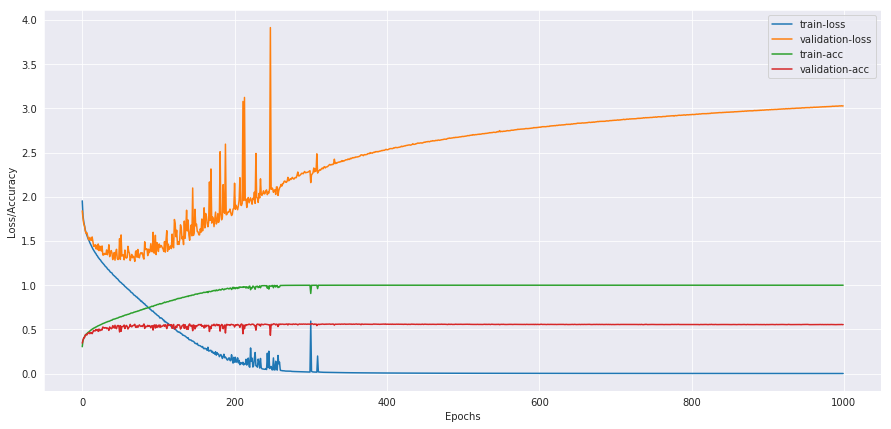

In [8]:
# Plot the loss and accuracy curves to ascertain model performane
f, ax = plt.subplots(1, 1, figsize=(15, 7))
sns.lineplot(x=range(0,1000),
             y=H.history['loss'],
             label="train-loss",
             ax=ax)
sns.lineplot(x=range(0,1000),
             y=H.history['val_loss'], 
             label="validation-loss", 
             ax=ax)
sns.lineplot(x=range(0,1000), 
             y=H.history['acc'], 
             label="train-acc",
             ax=ax)
sns.lineplot(x=range(0,1000), 
             y=H.history['val_acc'], 
             label="validation-acc",
             ax=ax)
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss/Accuracy')

The training and validation loss curves above diverge at larger epochs showing that the model that has been trained so far is grossly overfit on the training data and hence requires hyperparameter optimization for better performance.